In [1]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

## Our x-axis will be the 7" CO intensity from the smoothed mask.
## Our y-axis will be the Halpha flux smoothed to 7".

In [2]:
hafile = '../img_califa/NGC4047.flux_elines.hdf5'
cofile = '../img_comom/NGC4047.comom.smo7_smo.hdf5'

In [3]:
cotab=Table.read(cofile, path='data')
print(cotab)

  Name   ix  iy   ra_off    dec_off    mom0  emom0  emom0max
                   deg        deg     K.KM/S K.KM/S  K.KM/S 
------- --- --- ---------- ---------- ------ ------ --------
NGC4047   2   2  0.0327726 -0.0216713    nan    nan      nan
NGC4047   2   5  0.0327731  -0.020838    nan    nan      nan
NGC4047   2   8  0.0327737 -0.0200047    nan    nan      nan
NGC4047   2  11  0.0327742 -0.0191713    nan    nan      nan
NGC4047   2  14  0.0327748  -0.018338    nan    nan      nan
NGC4047   2  17  0.0327753 -0.0175047    nan    nan      nan
NGC4047   2  20  0.0327758 -0.0166713    nan    nan      nan
NGC4047   2  23  0.0327764  -0.015838    nan    nan      nan
NGC4047   2  26  0.0327769 -0.0150047    nan    nan      nan
NGC4047   2  29  0.0327775 -0.0141713    nan    nan      nan
    ... ... ...        ...        ...    ...    ...      ...
NGC4047 158 131 -0.0327959   0.014162    nan    nan      nan
NGC4047 158 134 -0.0327964  0.0149953    nan    nan      nan
NGC4047 158 137  -0.0327

In [4]:
hatab=Table.read(hafile, path='data')
print(hatab)

  Name   ix  iy ... e_EW_[NII]6548_sm e_EW_[SII]6717_sm e_EW_[SII]6731_sm
                ...      Angstrom          Angstrom          Angstrom    
------- --- --- ... ----------------- ----------------- -----------------
NGC4047   2   2 ...               nan               nan               nan
NGC4047   2   5 ...               nan               nan               nan
NGC4047   2   8 ...               nan               nan               nan
NGC4047   2  11 ...               nan               nan               nan
NGC4047   2  14 ...               nan               nan               nan
NGC4047   2  17 ...               nan               nan               nan
NGC4047   2  20 ...               nan               nan               nan
NGC4047   2  23 ...               nan               nan               nan
NGC4047   2  26 ...               nan               nan               nan
NGC4047   2  29 ...               nan               nan               nan
    ... ... ... ...               ... 

In [5]:
jointbl = join(cotab,hatab)

In [6]:
print(jointbl.colnames)

['Name', 'ix', 'iy', 'ra_off', 'dec_off', 'mom0', 'emom0', 'emom0max', 'flux_[OII]3727_rg', 'flux_[OIII]5007_rg', 'flux_[OIII]4959_rg', 'flux_Hbeta_rg', 'flux_Halpha_rg', 'flux_[NII]6583_rg', 'flux_[NII]6548_rg', 'flux_[SII]6717_rg', 'flux_[SII]6731_rg', 'vel_[OII]3727_rg', 'vel_[OIII]5007_rg', 'vel_[OIII]4959_rg', 'vel_Hbeta_rg', 'vel_Halpha_rg', 'vel_[NII]6583_rg', 'vel_[NII]6548_rg', 'vel_[SII]6717_rg', 'vel_[SII]6731_rg', 'disp_[OII]3727_rg', 'disp_[OIII]5007_rg', 'disp_[OIII]4959_rg', 'disp_Hbeta_rg', 'disp_Halpha_rg', 'disp_[NII]6583_rg', 'disp_[NII]6548_rg', 'disp_[SII]6717_rg', 'disp_[SII]6731_rg', 'EW_[OII]3727_rg', 'EW_[OIII]5007_rg', 'EW_[OIII]4959_rg', 'EW_Hbeta_rg', 'EW_Halpha_rg', 'EW_[NII]6583_rg', 'EW_[NII]6548_rg', 'EW_[SII]6717_rg', 'EW_[SII]6731_rg', 'e_flux_[OII]3727_rg', 'e_flux_[OIII]5007_rg', 'e_flux_[OIII]4959_rg', 'e_flux_Hbeta_rg', 'e_flux_Halpha_rg', 'e_flux_[NII]6583_rg', 'e_flux_[NII]6548_rg', 'e_flux_[SII]6717_rg', 'e_flux_[SII]6731_rg', 'e_vel_[OII]3727_r

Text(0,0.5,'H$\\alpha$ intensity [1e-16 erg / (cm2 s)]')

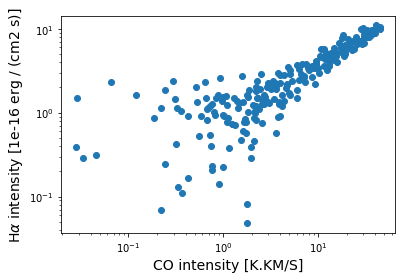

In [7]:
plt.loglog(jointbl['mom0'],jointbl['flux_Halpha_sm'],ls='None',marker='o')
plt.xlabel('CO intensity ['+str(jointbl['mom0'].unit)+']',fontsize=14)
plt.ylabel(r'H$\alpha$ intensity ['+str(jointbl['flux_Halpha_sm'].unit)+']',fontsize=14)